In [1]:
import numpy as np
import os
from PIL import Image


def load(dir, files, reshaped):
    "Load .npy or .npz files from disk and return them as numpy arrays. \
    Takes in a list of filenames and returns a list of numpy arrays."

    data = []
    for file in files:
        f = np.load(dir + file)
        if reshaped:
            new_f = []
            for i in range(len(f)):
                x = np.reshape(f[i], (28, 28))
                x = np.expand_dims(x, axis=0)
                x = np.reshape(f[i], (28, 28, 1))
                new_f.append(x)
            f = new_f
        data.append(f)
    return data


def normalize(data):
    "Takes a list or a list of lists and returns its normalized form"

    return np.interp(data, [0, 255], [-1, 1])


def denormalize(data):
    "Takes a list or a list of lists and returns its denormalized form"

    return np.interp(data, [-1, 1], [0, 255])


def visualize(array):
    "Visulaze a 2D array as an Image"

    img = Image.fromarray(array)
    img.show(title="Visulizing array")


def set_limit(arrays, n):
    "Limit elements from each array up to n elements and return a single list"
    new = []
    for array in arrays:
        i = 0
        for item in array:
            if i == n:
                break
            new.append(item)
            i += 1
    return new


def make_labels(N1, N2):
    "make labels from 0 to N1, each repeated N2 times"
    labels = []
    for i in range(N1):
        labels += [i] * N2
    return labels

In [2]:
# Keras
from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.utils.sequence import pad_sequences
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
import os

# Function to extract the last underscore element
def extract_name(filename):
    return filename.rsplit('_', 1)[-1].rsplit('.', 1)[0]

# Define the directory path
directory = "data/"

# List all the files in the directory
files = os.listdir(directory)

# Create an empty dictionary for FRUITS
FRUITS = {}

# Iterate through the files
for i, file in enumerate(files):
    fruit_name = extract_name(file)
    FRUITS[i] = fruit_name

# Print the updated FRUITS dictionary
print("Updated FRUITS Dictionary:")
print(FRUITS)


Updated FRUITS Dictionary:
{0: 'apple', 1: 'banana', 2: 'calculator', 3: 'candle', 4: 'circle', 5: 'cloud', 6: 'donut', 7: 'fish', 8: 'flower', 9: 'hexagon', 10: 'house', 11: 'ladder', 12: 'pizza', 13: 'square', 14: 'sword', 15: 'watermelon', 16: 'wheel'}


In [4]:
files=[]
for value in FRUITS.values():
    files.append("full_numpy_bitmap_"+value + ".npy")

In [5]:
len(files)

17

In [6]:
# from prepare_data import *
from sklearn.model_selection import train_test_split as tts
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from random import randint

# define some constants
N_FRUITS = 17
# FRUITS = {0: "Apple", 1: "Banana",2:""}

# number of samples to take in each class
N = 10000

# some other constants
N_EPOCHS = 2

# data files in the same order as defined in FRUITS
# files = []

# images need to be 28x28 for training with a ConvNet
fruits = load("data/", files, reshaped=True)




# limit no of samples in each class to N
fruits = set_limit(fruits, N)

# normalize the values
fruits=list(map(normalize, fruits))
# define the labels
labels = make_labels(N_FRUITS, N)
len(fruits)

170000

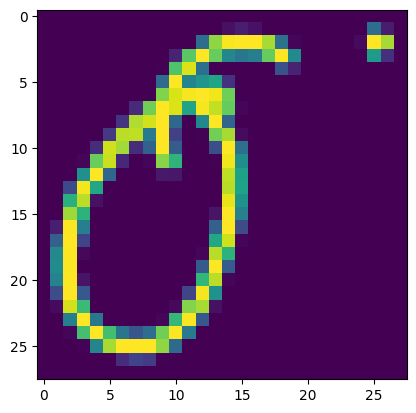

In [7]:
# fruits[0]
plt.imshow(fruits[0])
plt.show()

## Model workflow

In [8]:

# prepare the data
x_train, x_test, y_train, y_test = tts(fruits, labels, test_size=0.3)

# one hot encoding
Y_train = to_categorical(y_train, N_FRUITS)
Y_test = to_categorical(y_test, N_FRUITS)


In [9]:

# use our custom designed ConvNet model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(N_FRUITS, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [10]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch/2)
)

In [11]:

history = model.fit(np.array(x_train), np.array(Y_train), batch_size=64, epochs=5, verbose=1,validation_split=0.2)


Epoch 1/5
1488/1488 [==============================] - 30s 5ms/step - loss: 0.5546 - accuracy: 0.8314 - val_loss: 0.3405 - val_accuracy: 0.8975
Epoch 2/5
1488/1488 [==============================] - 7s 5ms/step - loss: 0.3260 - accuracy: 0.9015 - val_loss: 0.2869 - val_accuracy: 0.9134
Epoch 3/5
1488/1488 [==============================] - 8s 5ms/step - loss: 0.2730 - accuracy: 0.9169 - val_loss: 0.2701 - val_accuracy: 0.9179
Epoch 4/5
1488/1488 [==============================] - 8s 5ms/step - loss: 0.2387 - accuracy: 0.9248 - val_loss: 0.2596 - val_accuracy: 0.9191
Epoch 5/5
1488/1488 [==============================] - 8s 5ms/step - loss: 0.2152 - accuracy: 0.9323 - val_loss: 0.2480 - val_accuracy: 0.9237


Training complete
Evaluating model
1594/1594 [==============================] - 2s 1ms/step
Accuracy:  92.26274509803922
Model saved
Testing mode
1/1 [==============================] - 0s 89ms/step
Actual: calculator
Predicted: [[5.5527414e-07 1.6845016e-08 9.9926490e-01 1.3068739e-04 9.8946839e-06
  4.3534118e-07 1.7366630e-06 5.8135178e-08 5.4212551e-06 3.9701710e-05
  3.1443487e-04 3.6978581e-05 6.3269836e-06 1.8531641e-04 1.3108212e-07
  3.1955467e-06 8.1290054e-08]]


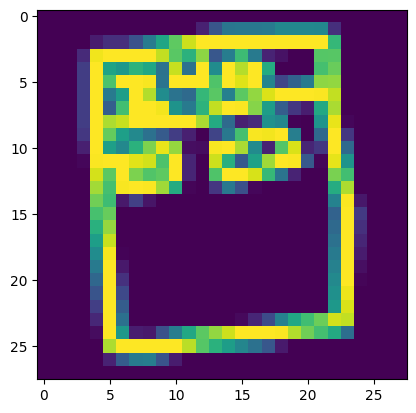

In [12]:

print("Training complete")

print("Evaluating model")
preds = model.predict(np.array(x_test))

score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)

model.save("model" + ".h5")
print("Model saved")


def visualize_and_predict():
    n = randint(0, len(x_test))
    plt.imshow(x_test[n])
    # visualize(denormalize(np.reshape(x_test[n], (28, 28))))
    # pred = FRUITS[np.argmax(model.predict(np.array([x_test[n]])))]
    pred=model.predict(np.array([x_test[n]]))
    actual = FRUITS[y_test[n]]
    print("Actual:", actual)
    print("Predicted:", pred)


print("Testing mode")
visualize_and_predict()

In [13]:
# # !pip install visualkeras
# import visualkeras
# visualkeras.layered_view(model,legend=True, draw_volume=True)


## Loss Plot

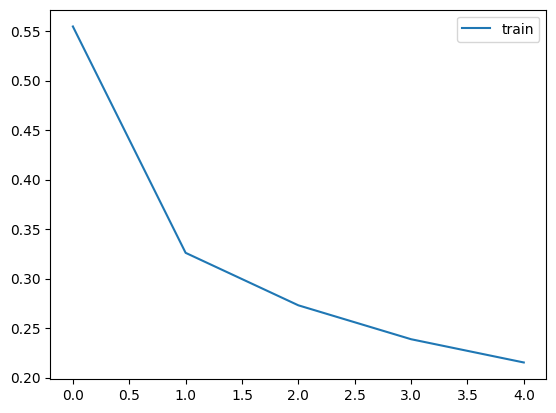

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.legend()
plt.show()

## Train Plot

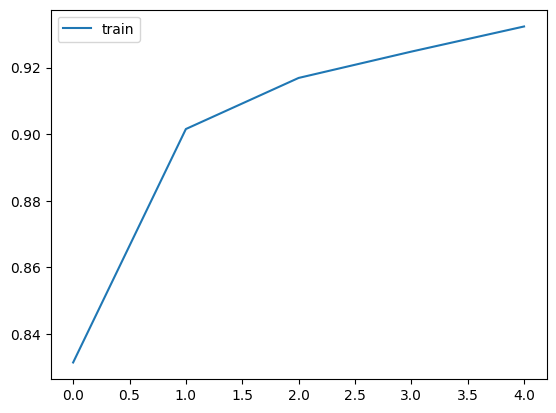

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="train")
plt.legend()
plt.show()

## Testing

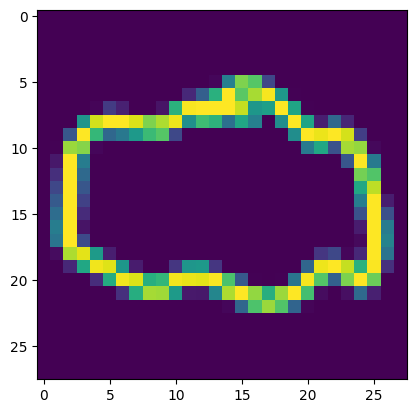

1/1 [==============================] - 0s 14ms/step
Actual: cloud
Predicted: cloud


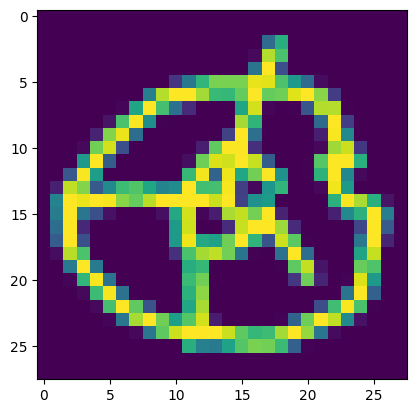

1/1 [==============================] - 0s 17ms/step
Actual: wheel
Predicted: wheel


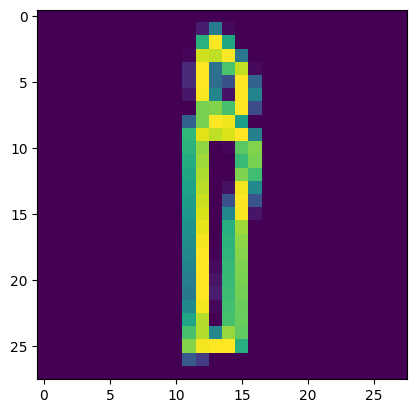

1/1 [==============================] - 0s 15ms/step
Actual: candle
Predicted: candle


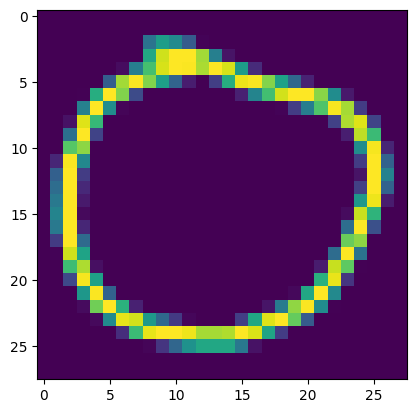

1/1 [==============================] - 0s 15ms/step
Actual: circle
Predicted: circle


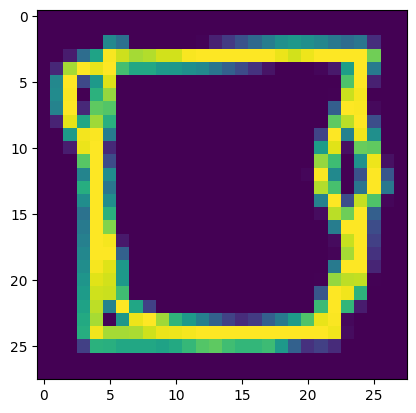

1/1 [==============================] - 0s 16ms/step
Actual: square
Predicted: square


In [16]:
def visualize_and_predict():
    "selects a random test case and shows the object, the prediction and the expected result"
    n = randint(0, len(x_test))
    plt.imshow(x_test[n])
    plt.show()
    pred = FRUITS[np.argmax(model.predict(np.array([x_test[n]])))]
    actual = FRUITS[y_test[n]]
    print("Actual:", actual)
    print("Predicted:", pred)


for i in range(5):
    visualize_and_predict()

In [17]:
x_test[0].shape

(28, 28, 1)

In [18]:
from keras.models import load_model
model = load_model('model.h5')

In [19]:
import gradio as gr

c:\Users\gagan\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# def classification_of_digits(img):
#   img_3d=img.reshape(1,28,28,1)
#   im_resize=list(map(normalize, img_3d))
#   prediction=model.predict(np.array(im_resize))
#   pred=np.argmax(prediction)
#   return FRUITS[pred]
def classify_hand_drawn(sketch):
    sketch_3d = sketch.reshape(1, 28, 28, 1)
    sketch_normalized = normalize(sketch_3d)
    prediction = model.predict(sketch_normalized)
    predicted_class = np.argmax(prediction)
    return FRUITS[predicted_class]


In [21]:
# digit_interface = gr.Interface(classification_of_digits, inputs="sketchpad", outputs="label",title="AI Doodle Game",description="Can a neural network learn to recognize doodling? ")
# digit_interface.launch(share=True)

hand_drawn_interface = gr.Interface(classify_hand_drawn, inputs="sketchpad", outputs="label", title="AI Doodle Game", description="Can a neural network learn to recognize doodling?")
hand_drawn_interface.launch(share=True)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 [==============================] - 0s 15ms/step
